### Unsupervised Machine Learning. - Clustering Using K-Means#

#### K-Means clustering is a popular unsupervised machine learning algorithm used to partition a dataset into a predefined number of clusters (k). 
#### The goal of this algorithm is to group similar data points together and discover underlying patterns. Here's a breakdown of how it works:
#### Algorithm Steps

#### --Choose K: Select the number of clusters (K).

#### --Initialize Centroids: Randomly pick K data points as initial centroids (or use K-Means++ for smarter initialization).

#### --Assign Points: Assign each data point to the nearest centroid using Euclidean distance (or other metrics).

#### --Update Centroids: Recalculate centroids as the mean of all points in each cluster.

#### --Repeat: Iterate steps 3–4 until convergence (centroids stabilize or maximum iterations reached).

#### --Choosing K

#### --Elbow Method: Plot the sum of squared distances (inertia) against K; the "elbow" point suggests optimal K.

#### --Silhouette Score: Measures cluster cohesion/separation. Higher scores indicate better-defined clusters.

In [2]:
# for data analysis
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for data preporcessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# For Machine Leaning and Evaluation
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, homogeneity_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load the dataset

data = pd.read_csv('Customers.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# Correcting the wrong feature descriotion -'Genre' to 'Gender'
data.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income_(k$)', 'Spending_Score']

In [7]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [8]:
data.shape

(200, 5)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
data.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


CustomerID            0
Gender                0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


<Axes: >

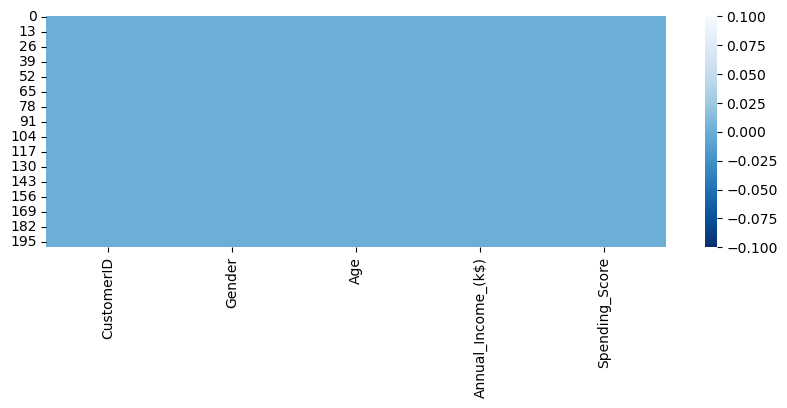

In [11]:
# check for missing value
print(data.isnull().sum())

# visualizing missing values
plt.figure(figsize=(10,3))
sns.heatmap(data.isnull(), cbar=True, cmap="Blues_r")

### Data Cleaning and Preprocessing

In [13]:
print(data.duplicated().sum())

0


### Exploratory Data Analysis

In [15]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [16]:
# Checking for Outliers

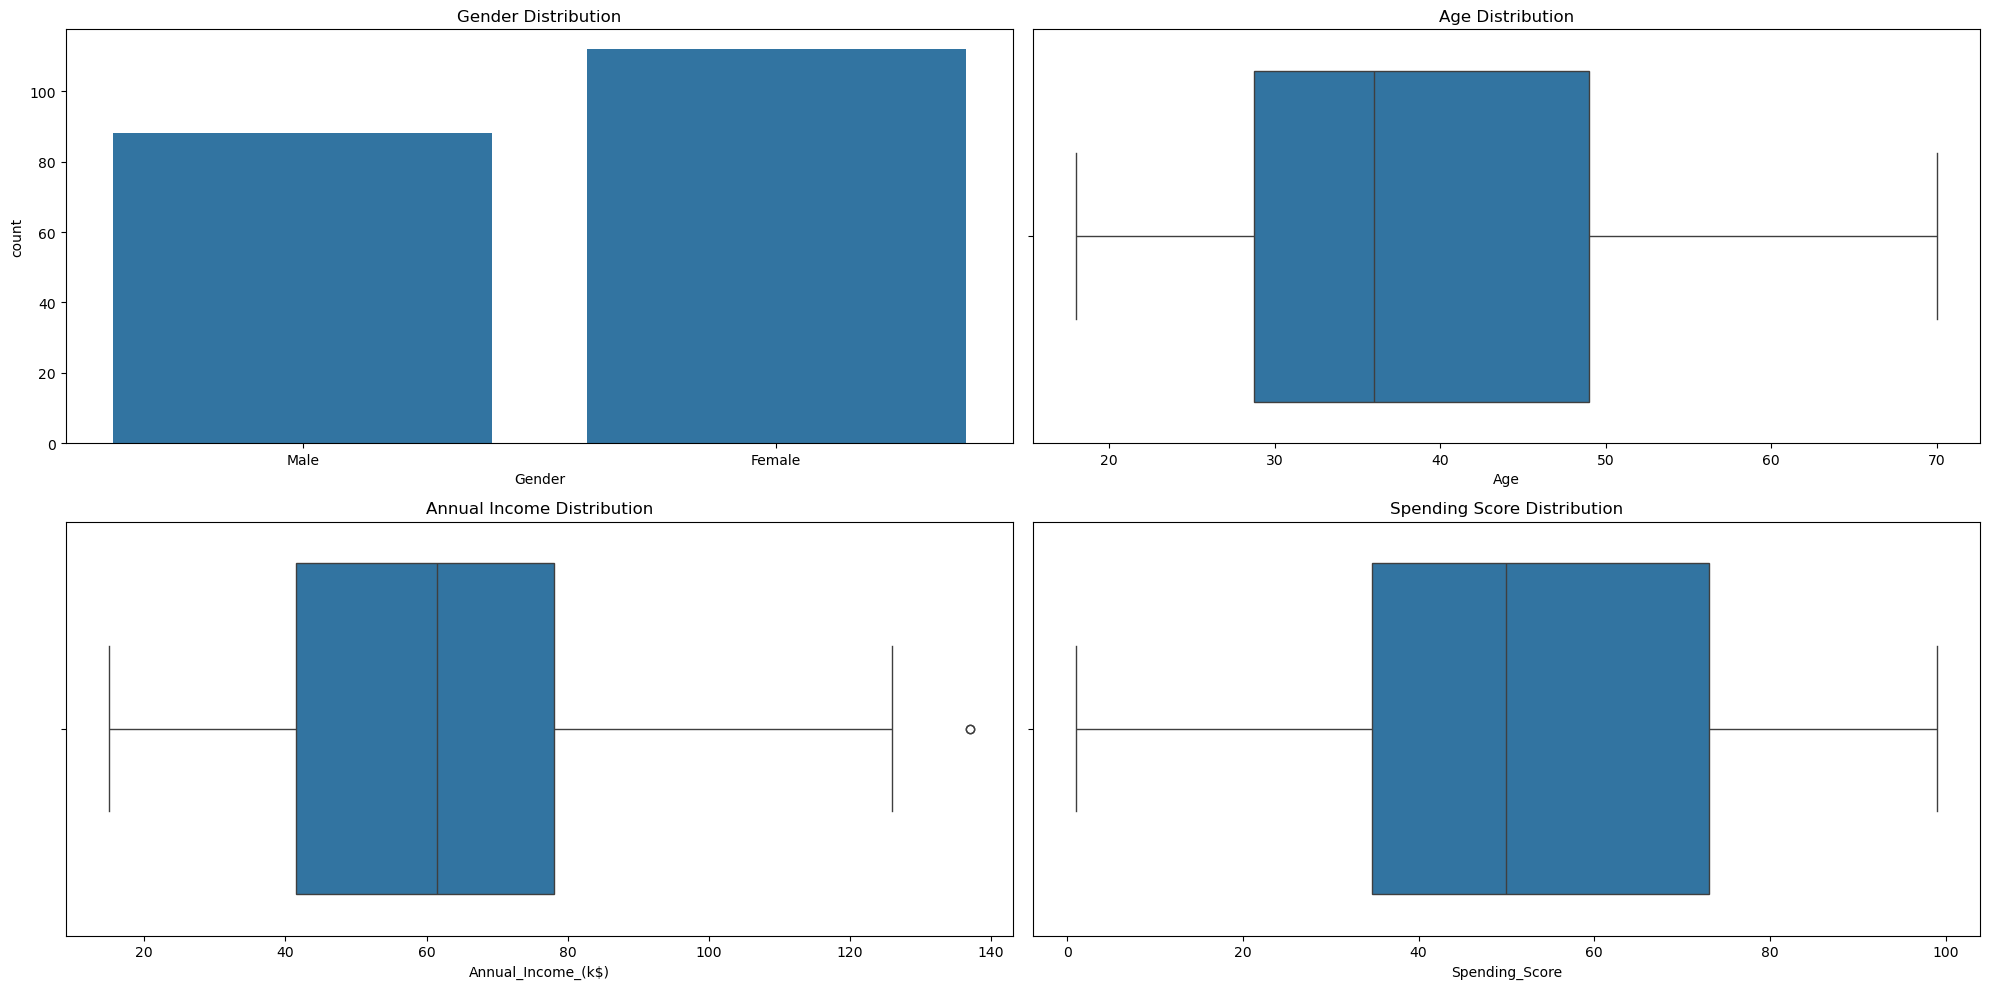

In [17]:
fig, axs = plt.subplots(2,2, figsize=(20,10))

plt1 = sns.countplot(x=data['Gender'], ax=axs[0, 0])
plt1.set_title('Gender Distribution')

plt2 = sns.boxplot(x=data['Age'], ax = axs[0,1])
plt2.set_title('Age Distribution')

plt3 = sns.boxplot(x=data['Annual_Income_(k$)'], ax = axs[1,0])
plt3.set_title('Annual Income Distribution')

plt4 = sns.boxplot(x=data['Spending_Score'], ax = axs[1,1])
plt4.set_title('Spending Score Distribution') 

plt.tight_layout()
plt.show()


### EDA - Univariant Analysis

In [19]:
data['Spending_Score'].max()

99

In [20]:
data['Spending_Score'].min()

1

Text(0.5, 1.0, 'Total Number of Customers')

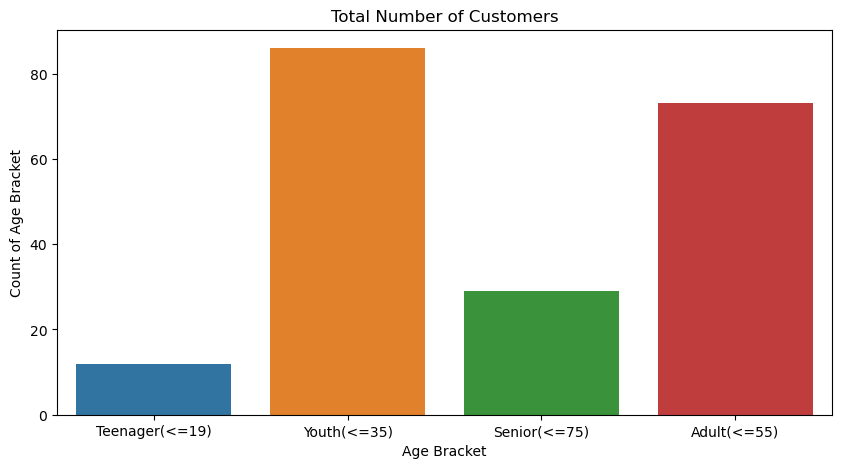

In [21]:
# Investigating the age of the Customers
# Age Bracket

def age_bracket(age):
    if age <= 19:
        return 'Teenager(<=19)'
    elif age <= 35:
        return 'Youth(<=35)'
    elif age <= 55:
        return 'Adult(<=55)'
    elif age <= 75:
        return 'Senior(<=75)'
    else:
        return 'Elderly(>75)'

data['age_bracket'] = data['Age'].apply(age_bracket)

plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket', data=data, hue='age_bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Count of Age Bracket')
plt.title('Total Number of Customers')

Text(0.5, 1.0, 'Total Number of Customers')

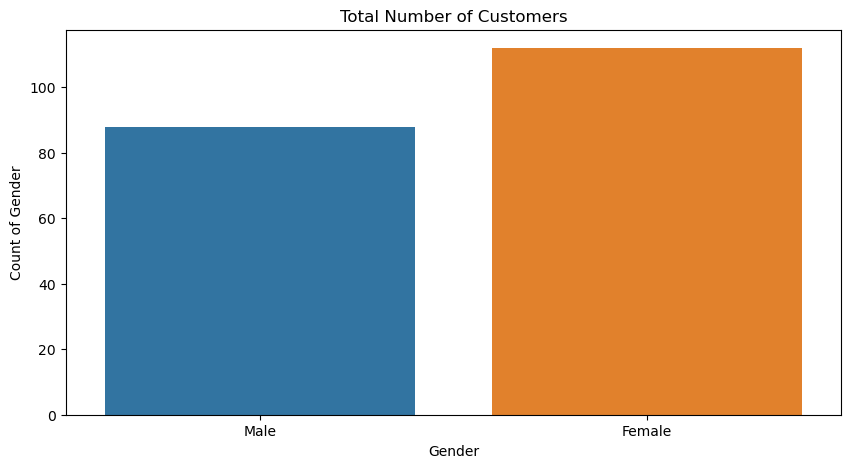

In [22]:
# Investigating the Gender of the Customers
# Gender


plt.figure(figsize=(10,5))
sns.countplot(x='Gender', data=data, hue='Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Gender')
plt.title('Total Number of Customers')

Text(0.5, 1.0, 'Total Number of Customerss')

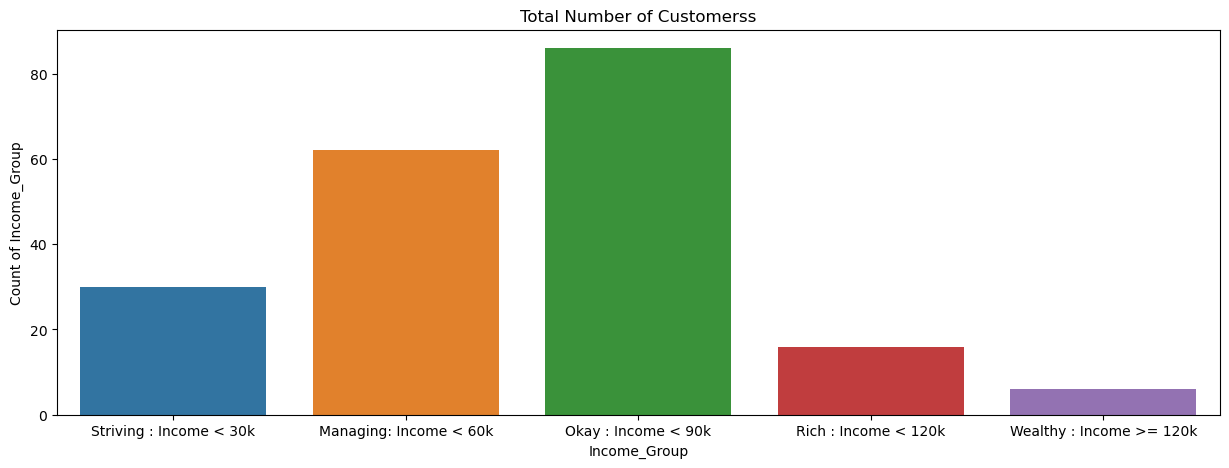

In [23]:
# Investigating the annual income  of the Customers
# 
def income_bracket(Income):
    if Income < 30:
        return 'Striving : Income < 30k'
    elif Income < 60:
        return 'Managing: Income < 60k'
    elif Income < 90:
        return 'Okay : Income < 90k'
    elif  Income < 120:
        return 'Rich : Income < 120k'
    else:
        return 'Wealthy : Income >= 120k'

data['income_bracket'] = data['Annual_Income_(k$)'].apply(income_bracket)

# Investigating the income bracket of the applicant

plt.figure(figsize=(15,5))
sns.countplot(x='income_bracket', data=data, hue='income_bracket')
plt.xlabel('Income_Group')
plt.ylabel('Count of Income_Group')
plt.title('Total Number of Customerss')
    

Text(0.5, 1.0, 'Total Number of Customers')

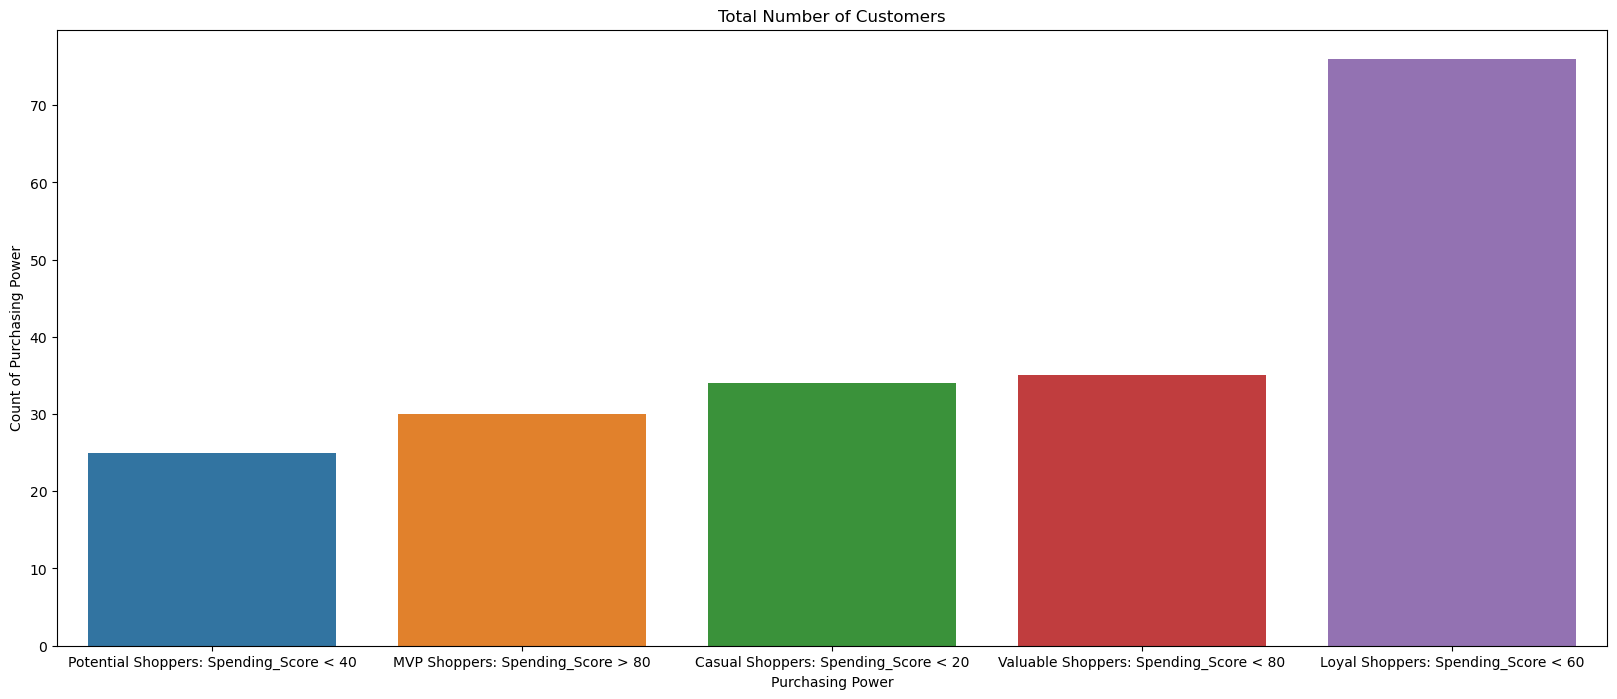

In [24]:
# Investigating the Purchasing power of the customers
# 
def purchase_power(Spending_Score):
    if Spending_Score < 20:
        return 'Casual Shoppers: Spending_Score < 20'
    elif Spending_Score < 40:
        return 'Potential Shoppers: Spending_Score < 40'
    elif Spending_Score < 60:
        return 'Loyal Shoppers: Spending_Score < 60'
    elif  Spending_Score < 80:
        return 'Valuable Shoppers: Spending_Score < 80'
    else:
        return 'MVP Shoppers: Spending_Score > 80'

data['purchase_power'] = data['Spending_Score'].apply(purchase_power)

# Investigating the Purchasing power of the customers

plt.figure(figsize=(20,8))
sns.countplot(x='purchase_power', data=data, hue='purchase_power')
plt.xlabel('Purchasing Power')
plt.ylabel('Count of Purchasing Power')
plt.title('Total Number of Customers')
    

### EDA Bivariant Analysis

Text(0.5, 1.0, 'Total Number of Customers')

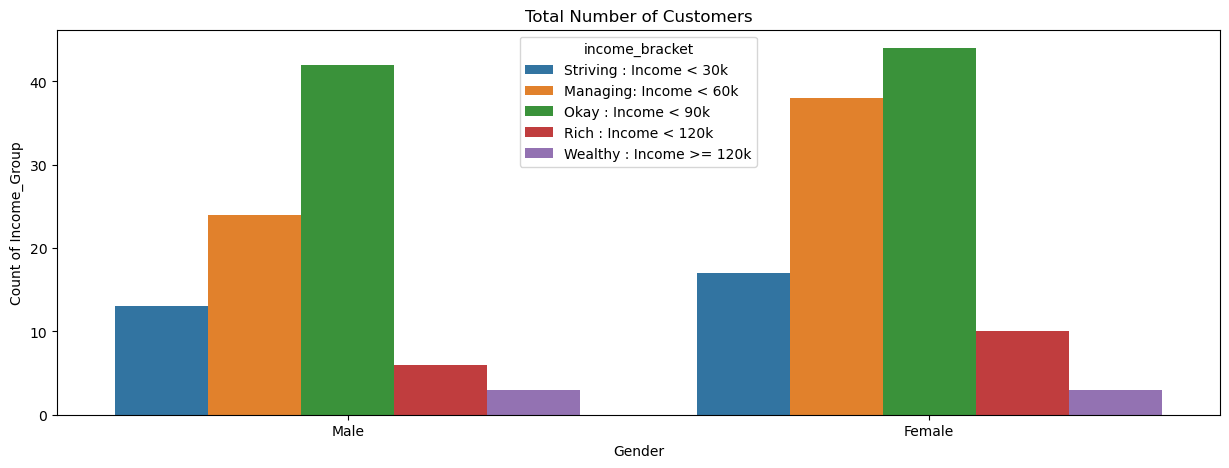

In [26]:
# Investigating the Gender and annual income  of the Customers
plt.figure(figsize=(15,5))
sns.countplot(x='Gender', data=data, hue='income_bracket')
plt.xlabel('Gender')
plt.ylabel('Count of Income_Group')
plt.title('Total Number of Customers')
    

Text(0.5, 1.0, 'Total Number of Customers')

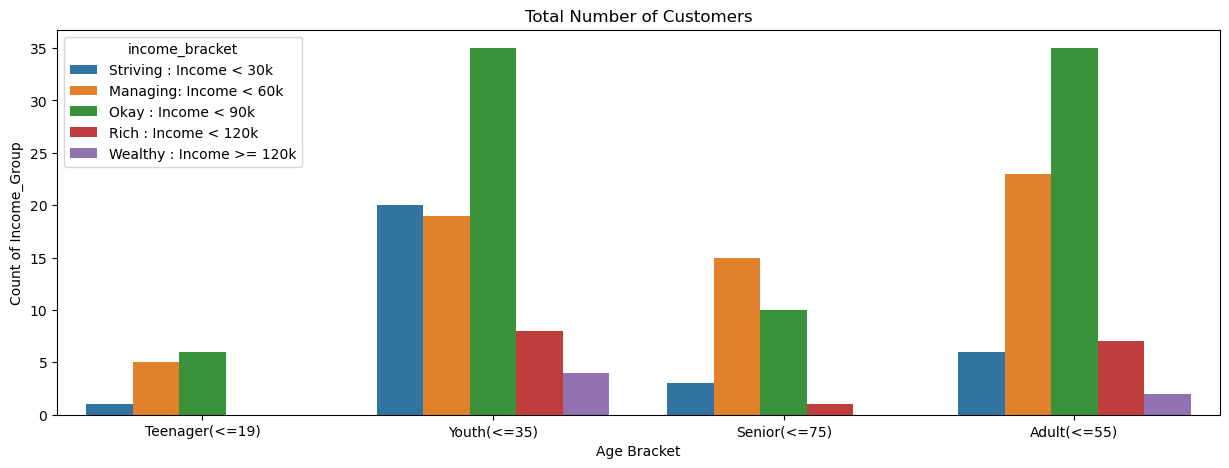

In [27]:
# Investigating the Gender and annual income  of the Customers
plt.figure(figsize=(15,5))
sns.countplot(x='age_bracket', data=data, hue='income_bracket')
plt.xlabel('Age Bracket')
plt.ylabel('Count of Income_Group')
plt.title('Total Number of Customers')

Text(0.5, 1.0, 'Total Number of Customers')

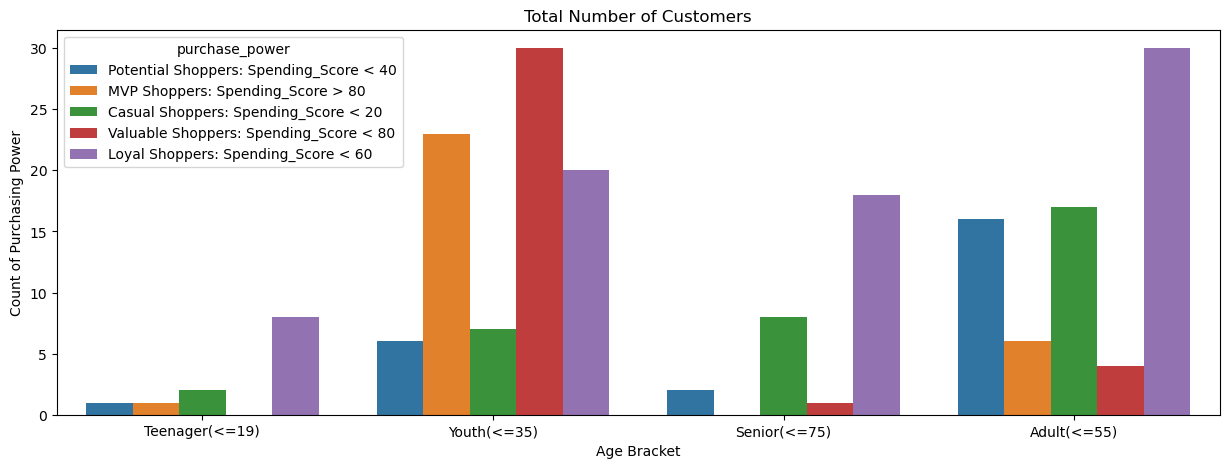

In [28]:
# Investigating the Age Bracket  and Purchasing Power  of the Customers
plt.figure(figsize=(15,5))
sns.countplot(x='age_bracket', data=data, hue='purchase_power')
plt.xlabel('Age Bracket')
plt.ylabel('Count of Purchasing Power')
plt.title('Total Number of Customers')

In [29]:
# Create an instance of the encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


# looping for columns - Convert categorical variable into numberic variable

for c in data.columns[1:]:
    if (data[c].dtypes=='object'):
        data[c] = encoder.fit_transform(data[c])
    else:
        data[c] = data[c]

data.head()


,CustomerID,Gender,Age,Annual_Income_(k$),Spending_Score,age_bracket,income_bracket,purchase_power
0,1,1,19,15,39,2,3,3
1,2,1,21,15,81,3,3,2
2,3,0,20,16,6,3,3,0
3,4,0,23,16,77,3,3,4
4,5,0,31,17,40,3,3,1


In [30]:
data.drop(['CustomerID'], axis=1, inplace =True)
data.head()

,Gender,Age,Annual_Income_(k$),Spending_Score,age_bracket,income_bracket,purchase_power
0,1,19,15,39,2,3,3
1,1,21,15,81,3,3,2
2,0,20,16,6,3,3,0
3,0,23,16,77,3,3,4
4,0,31,17,40,3,3,1


In [31]:
#data.drop(['age_bracket', 'income_bracket', 'purchase_power'], axis=1, inplace =True)

In [32]:
data.head()

,Gender,Age,Annual_Income_(k$),Spending_Score,age_bracket,income_bracket,purchase_power
0,1,19,15,39,2,3,3
1,1,21,15,81,3,3,2
2,0,20,16,6,3,3,0
3,0,23,16,77,3,3,4
4,0,31,17,40,3,3,1


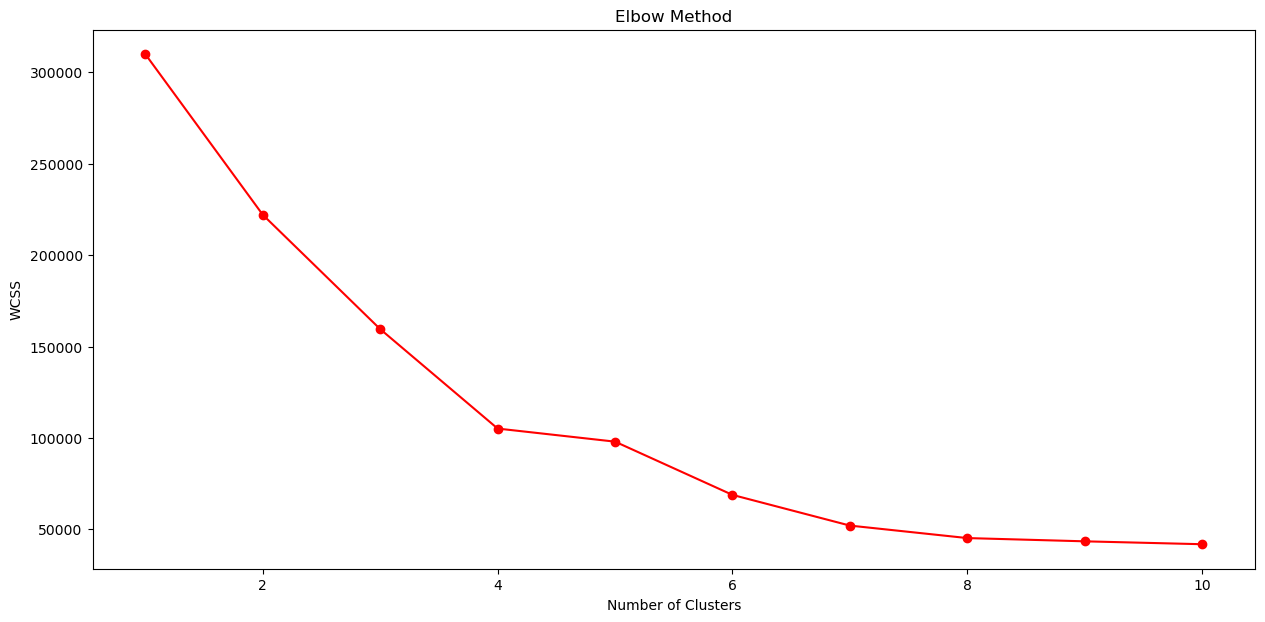

In [33]:
# Determining the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++' , random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15, 7))
plt.plot(range(1, 11), wcss, color='red' , marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

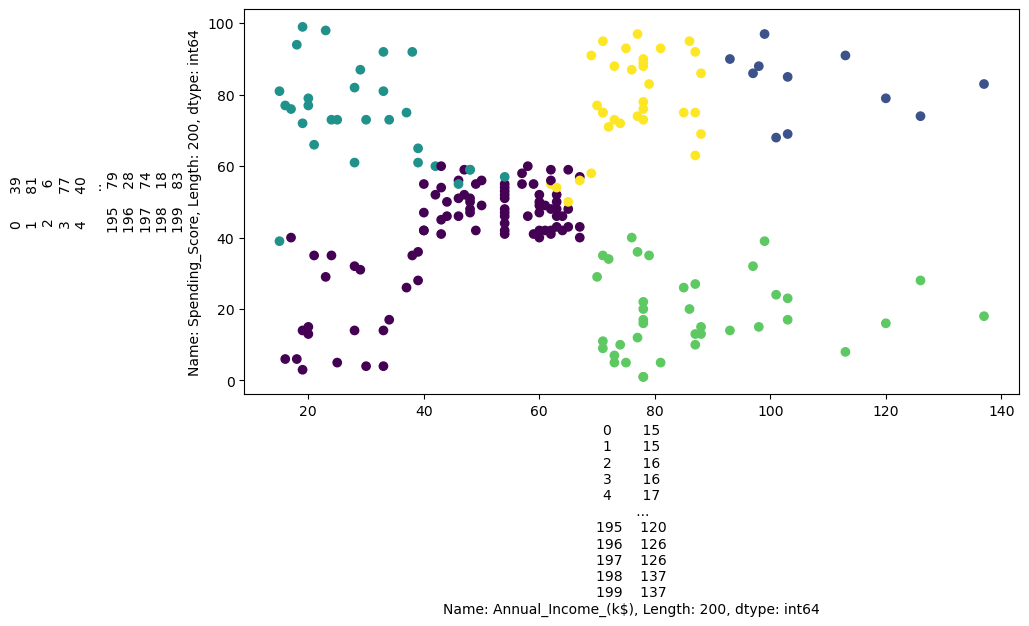

0.35817956451964

In [34]:
# Fit K-Meansclustering Model
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data)

#Add cluster labe to data
data['Cluster'] = kmeans.labels_

# visualise cluster result
plt.figure(figsize=(10, 5))
plt.scatter(data['Annual_Income_(k$)'], data['Spending_Score'], c=data['Cluster'], label='Centroids')
plt.xlabel(data['Annual_Income_(k$)'])
plt.ylabel(data['Spending_Score'])
plt.show()

# Calculate Silhouette score

from sklearn.metrics import silhouette_score
silhouette_score(data, kmeans.labels_)

#  Interpretation

•	Cluster (Yellow/Orange - Top Center/Right): High Income, High Spending Score: This segment represents customers who earn a high annual income and also tend to spend a lot. These are likely your most valuable customers and could be the target of premium product offers or loyalty programs.

•	Cluster (Teal/Cyan - Top Left): High Income, Low Spending Score: This group consists of customers with high annual incomes but relatively low spending scores. There could be several reasons for this: they might be saving more, spending on different types of products/services not captured here, or they might be potential targets for strategies to increase their spending.

•	Cluster (Purple/Dark Blue - Center): Moderate Income, Moderate Spending Score: This appears to be a large segment of customers with average incomes and average spending habits. They represent a significant portion of your customer base and might be responsive to a wide range of offers.

•	Cluster (Green - Bottom Right): Low Income, High Spending Score: This segment includes customers with lower annual incomes but high spending scores. These customers might be particularly price-sensitive but enjoy spending. Understanding what drives their high spending despite lower income could be valuable.

•	Cluster (Dark Purple/Blue - Bottom Left): Low Income, Low Spending Score: This segment represents customers with lower annual incomes and lower spending habits. They might be more budget-conscious. Strategies for this group could focus on value-oriented offers.
Key Takeaways and Potential Actions:

•	Targeted Marketing: These segments allow for more targeted marketing campaigns. Instead of a one-size-fits-all approach, targeted messaging and offers to the specific needs and spending habits of each group.

•	Product Development: Understanding these segments can inform product development. 

•	Customer Relationship Management: You can personalize your interactions with customers based on their segment. High-value customers (High Income, High Spending) might benefit from personalized attention, while others might respond better to different communication styles.

•	Risk Assessment (if applicable): If these features are related to risk (which doesn't seem to be the case here with income and spending), segmentation could help identify high-risk or low-risk groups.

•	Further Analysis:  Further analyse these segments by looking at other customer attributes (age, demographics, purchase history, etc.) to gain even deeper insights into their behavior and preferences.

In essence, this segmentation provides a valuable framework for understanding the diversity within your customer base and can drive more effective business strategies. The visual representation makes it easy to grasp the distinct groups based on their income and spending patterns.


